In [286]:
import pandas as pd
import pickle
import numpy as np 
import os
import networkx as nx
import matplotlib.pyplot as plt
import gzip
from scipy import stats

In [287]:
# Comfit Data


list_of_relevant_social_networks = ['Dolphin_social_network_Dolphins',
                                    'Email_network_Uni_R-V_Spain_Email_network_Uni_R-V_Spain',
                                    'Family_planning_in_Korea1',
                                    'Family_planning_in_Korea2',
                                    'High_school_dynamic_contact_networks_contact_list,_2011',
                                    'High_school_dynamic_contact_networks_contact_list,_2012',
                                    'Hollywood_film_music_Hollywood_film_music',
                                    'Kapferer_tailor_shop_Kapferer_tailor_shop_1',
                                    'Kapferer_tailor_shop_Kapferer_tailor_shop_2',
                                    'Les_Miserables_coappearances_Les_Miserables',
                                    'NCAA_college_football_2000_American_College_Football',
                                    'Norwegian_Board_of_Directors_net1mode_2011-08-01',
                                    'Zachary_Karate_Club_Zachary_karate_club_77',
                                    'Zachary_Karate_Club_Zachary_karate_club_78']

pickle_in = open('./data/Comfitnet/CommunityFitNet.pickle', "rb")
comfitdata = pickle.load(pickle_in, encoding ='latin1')

comfitdata_social = comfitdata[comfitdata['network_name'].isin(list_of_relevant_social_networks)]
comfitnet_social_subset = comfitdata_social[['network_name','nodes_id', 'edges_id']].reset_index(drop=True)

comfit_dict = dict()

for i in range(0,len(comfitnet_social_subset)):
    network_name = comfitnet_social_subset.network_name[i]
    edgelist = pd.DataFrame(comfitnet_social_subset.edges_id[i])
    comfit_dict[network_name] = edgelist


In [288]:
# Ugandan Village Dataset
# Within organisation social networks
ugandan_village_dict = dict()
for i in os.listdir('./data/Uganda Network Edgelists 2013/friendship'):
    if 'txt' in i:
        x = pd.read_csv('./data/Uganda Network Edgelists 2013/friendship/' + str(i), header = None)
        ugandan_village_dict['Ugandan Village '+ str(i)] = x

In [153]:
# Email Networks

email_dict = dict()

for i in os.listdir('./data/emails/'):
    print(i)
    if 'mobileu' not in i:
        df = pd.read_csv('./data/emails/' + str(i), sep = ' ', header = None)
        df = df[df[0]=='#edge'].iloc[:,1:3].reset_index(drop=True).T.reset_index(drop=True).T
        email_dict[str(i)] = df

mobileu_df = pd.read_csv('./data/emails/mobileu.dat', sep = ' ').reset_index()
mobileu_df = mobileu_df[mobileu_df['level_0']=='#edge'].iloc[:,1:3].reset_index(drop=True).T.reset_index(drop=True).T
email_dict['mobileu.dat'] = mobileu_df

enron.dat
mobiled.dat
mobileu.dat
coauthor.dat
slashdot.dat
epinions.dat


In [371]:
# Intra Organisational Networks

intra_org = dict()

for i in os.listdir('./data/intraorganization-toreopshal/'):
    df = pd.read_csv('./data/intraorganization-toreopshal/' + str(i), sep = ' ', header = None).drop(columns=[0])
    df = df.T.reset_index(drop=True).T
    intra_org[str(i)] = df

In [372]:
#bengurion students

bengurion_students = pd.read_csv('./data/ben-gurion students/bengurion_students.csv')

bengurion_students = bengurion_students.rename(columns = {'Id1':0,'Id2':1})

In [373]:
# Hospital Temporal
hospital = pd.read_csv('./data/Hospital ward dynamic contacts/detailed_list_of_contacts_Hospital.dat', sep = '\t', header= None)
hospital = hospital.rename(columns = {0:'time', 1:0,2:1})

In [374]:
# Kenyan Households Temporal
across_households = pd.read_csv('./data/Kenyan Households/scc2034_kilifi_all_contacts_across_households.csv')
within_households = pd.read_csv('./data/Kenyan Households/scc2034_kilifi_all_contacts_within_households.csv')

across_households = across_households.rename(columns={'m1':0,'m2':1})
within_households = within_households.rename(columns={'m1':0,'m2':1})

In [378]:
dict_of_networks2 = dict({
                         'Bengurion Students': bengurion_students,
                        'Hospital Dynamic Contacts': hospital,
                        'Kenyan Village within Households': within_households,
                          'Kenyan Village Across Households':across_households
                         })


In [164]:
def generate_dict_of_degree_arrays(list_of_dicts):
    
    dict_of_network_graphs = dict()
    
    for dict_of_networks in list_of_dicts: 
        for network_name, network_data in dict_of_networks.items(): 
            # Case when the value of the dictionary item is a pandas edgelist
            if isinstance(network_data, pd.DataFrame):
                #             print('Plotting Graph for ' + str(network_name))
                graph = nx.from_pandas_edgelist(network_data, 0, 1)
                graph_degree = np.array(sorted([deg for id, deg in graph.degree()]))
                graph_degree_scaled = graph_degree - np.median(graph_degree)
                dict_of_network_graphs[str(network_name)] = graph_degree_scaled

                # Case when the value of the dictionary item is a numpy matrix
            elif isinstance(network_data, np.matrix):
            #             print('Plotting Graph for ' + str(network_name))
                graph = nx.from_numpy_matrix(network_data)
                graph_degree = np.array(sorted([deg for id, deg in graph.degree()]))
                graph_degree_scaled = graph_degree - np.median(graph_degree)
                dict_of_network_graphs[str(network_name)] = graph_degree_scaled
 
                    # Case when the value of the dictionary item is already a networkxGraph
            elif isinstance(network_data, nx.Graph):
                dict_of_network_graphs[str(network_name)] = network_data
                graph_degree = np.array(sorted([deg for id, deg in graph.degree()]))
                graph_degree_scaled = graph_degree - np.median(graph_degree)
                dict_of_network_graphs[str(network_name)] = graph_degree_scaled
            
    # Check if all graphs have been processed
    assert (len(dict_of_network_graphs)) == [sum(len(i) for i in list_of_dicts)][0]

    return(dict_of_network_graphs)
                

    

In [379]:
dict_of_degree_arrays = generate_dict_of_degree_arrays([ugandan_village_dict, 
                                                        email_dict, 
                                                       dict_of_networks2,
                                                       intra_org])

In [380]:
len(dict_of_degree_arrays.keys())

31

In [381]:
len(dict_of_degree_arrays.values())

31

In [382]:
def generate_adjacency_matrix_from_degree_dict(dict_of_degree_arrays):
    ks_distance_storage_list = dict()
    p_val_storage_list = dict()

    name_list = list(dict_of_degree_arrays.keys())
    degree_list = list(dict_of_degree_arrays.values())
    
    for i in range(0,len(degree_list)):
        ks_test_statistic = [ks_2samp(degree_list[i], j)[0] for j in degree_list]
        p_val = [ks_2samp(degree_list[i], j)[1] for j in degree_list]
        ks_distance_storage_list[name_list[i]] = ks_test_statistic
        p_val_storage_list[name_list[i]] = p_val
    

    ks_adjacency_matrix  = pd.DataFrame(ks_distance_storage_list, index = name_list)
    p_val_adjacency_matrix = pd.DataFrame(p_val_storage_list, index = name_list)
    
    # Checks for dimensionality
    assert ks_adjacency_matrix.shape[0] == ks_adjacency_matrix.shape[1] == len(name_list)
    assert ks_adjacency_matrix.shape == p_val_adjacency_matrix.shape
    
    return(ks_adjacency_matrix, p_val_adjacency_matrix)


    
    
    

In [383]:
ks_matrix, p_val_matrix = generate_adjacency_matrix_from_degree_dict(dict_of_degree_arrays)

In [384]:
ks_matrix.head()

,Ugandan Village 15.txt,Ugandan Village 14.txt,Ugandan Village 16.txt,Ugandan Village 17.txt,Ugandan Village 13.txt,Ugandan Village 12.txt,Ugandan Village 10.txt,Ugandan Village 11.txt,Ugandan Village 9.txt,Ugandan Village 8.txt,...,epinions.dat,mobileu.dat,Bengurion Students,Hospital Dynamic Contacts,Kenyan Village within Households,Kenyan Village Across Households,Cross_Parker-Consulting_info.txt,Cross_Parker-Manufacturing_info.txt,Cross_Parker-Manufacturing_aware.txt,Cross_Parker-Consulting_value.txt
Ugandan Village 15.txt,0.000000,0.185484,0.096774,0.153846,0.224044,0.153712,0.309179,0.264000,0.230337,0.143631,...,0.412063,0.330097,0.302027,0.426667,0.319149,0.284524,0.391304,0.350649,0.311688,0.369565
Ugandan Village 14.txt,0.185484,0.000000,0.118280,0.042308,0.044289,0.103712,0.123695,0.078516,0.087079,0.088666,...,0.364751,0.173270,0.346338,0.301075,0.236273,0.306452,0.274544,0.232405,0.258379,0.206522
Ugandan Village 16.txt,0.096774,0.118280,0.000000,0.093383,0.127270,0.071137,0.212405,0.167226,0.141658,0.046857,...,0.372816,0.244963,0.259997,0.346452,0.292267,0.234255,0.342683,0.272727,0.298701,0.272791
Ugandan Village 17.txt,0.153846,0.042308,0.093383,0.000000,0.070198,0.096943,0.155333,0.110154,0.098963,0.065666,...,0.345314,0.182823,0.318919,0.289231,0.245827,0.292308,0.282609,0.241958,0.267932,0.215719
Ugandan Village 13.txt,0.224044,0.044289,0.127270,0.070198,0.000000,0.089866,0.094638,0.039956,0.077946,0.086588,...,0.354864,0.131625,0.316940,0.284153,0.201256,0.316940,0.249822,0.194805,0.220779,0.166904


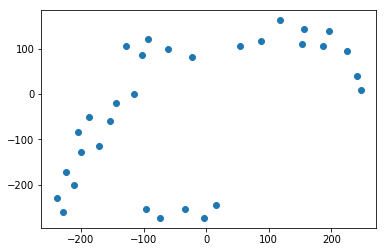

In [389]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, perplexity = 5).fit_transform(ks_matrix)

plt.scatter(embedding[:,0], embedding[:,1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


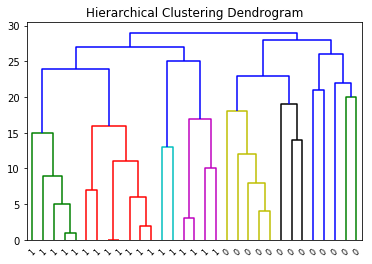

In [388]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    
clustering = AgglomerativeClustering().fit(ks_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)
plt.show()

In [387]:
# Checks for Statistical Significance

def check_for_stat_sig(ks_adjacency_matrix, p_val_adjacency_matrix):
    subset_stat_significance = ks_adjacency_matrix[p_val_adjacency_matrix.apply(lambda x: x < 0.10)]
    np.fill_diagonal(subset_stat_significance.values, 0)
    return (subset_stat_significance)

df = check_for_stat_sig(ks_matrix, p_val_matrix)
no_na = list(df.iloc[:,0].dropna().index)
df = df[df.index.isin(no_na)]
df = df.loc[:,df.columns.isin(no_na)]
df


,Ugandan Village 15.txt,Ugandan Village 14.txt,Ugandan Village 13.txt,Ugandan Village 12.txt,Ugandan Village 10.txt,Ugandan Village 11.txt,Ugandan Village 9.txt,Ugandan Village 8.txt,Ugandan Village 5.txt,Ugandan Village 4.txt,...,epinions.dat,mobileu.dat,Bengurion Students,Hospital Dynamic Contacts,Kenyan Village within Households,Kenyan Village Across Households,Cross_Parker-Consulting_info.txt,Cross_Parker-Manufacturing_info.txt,Cross_Parker-Manufacturing_aware.txt,Cross_Parker-Consulting_value.txt
Ugandan Village 15.txt,0.000000,0.185484,0.224044,0.153712,0.309179,0.264000,0.230337,0.143631,0.184783,0.240625,...,0.412063,0.330097,0.302027,0.426667,0.319149,0.284524,0.391304,0.350649,0.311688,0.369565
Ugandan Village 14.txt,0.185484,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.364751,0.173270,0.346338,0.301075,0.236273,0.306452,0.274544,0.232405,0.258379,0.206522
Ugandan Village 13.txt,0.224044,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.354864,NaN,0.316940,0.284153,0.201256,0.316940,0.249822,0.194805,0.220779,NaN
Ugandan Village 12.txt,0.153712,NaN,NaN,0.000000,0.184313,0.128629,0.123596,NaN,NaN,0.138223,...,0.362595,0.219443,0.305063,0.320932,0.276596,0.272406,0.317163,0.272727,0.298701,0.234194
Ugandan Village 10.txt,0.309179,NaN,NaN,0.184313,0.000000,NaN,NaN,0.174384,0.124396,NaN,...,0.339219,NaN,0.362319,0.280193,NaN,0.362319,0.229469,0.175482,0.201456,NaN
Ugandan Village 11.txt,0.264000,NaN,NaN,0.128629,NaN,0.000000,NaN,0.120369,NaN,0.113000,...,0.372831,0.141592,0.344000,0.302667,0.214043,0.344000,0.262609,0.200779,0.226701,NaN
Ugandan Village 9.txt,0.230337,NaN,NaN,0.123596,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.322583,NaN,0.304555,0.254682,NaN,0.297753,0.209575,0.177951,0.203925,NaN
Ugandan Village 8.txt,0.143631,NaN,NaN,NaN,0.174384,0.120369,NaN,0.000000,NaN,0.128294,...,0.360950,0.209514,0.271471,0.311003,0.256818,NaN,0.307235,0.245627,0.271601,0.225934
Ugandan Village 5.txt,0.184783,NaN,NaN,NaN,0.124396,NaN,NaN,NaN,0.000000,0.125000,...,0.374744,0.170114,0.288984,0.294783,0.234043,NaN,0.282609,0.229249,0.255223,0.206522
Ugandan Village 4.txt,0.240625,NaN,NaN,0.138223,NaN,0.113000,NaN,0.128294,0.125000,0.000000,...,0.293081,NaN,0.307601,0.232292,NaN,0.296875,0.198234,0.160430,0.186404,NaN
